In [62]:
import pandas as pd 
pd.set_option('display.max_rows', 5)  
pd.set_option('display.max_columns', 22)

''' In addition to the PDF and juptyer files, the ZIP download includes
 the dataset "Diabetescategorised.csv". Put them all in the same directory, then run cells. '''

df = pd.read_csv('Diabetescategorised.csv', )
print(df)

        Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                     0       1         1          1    2       1       0   
1                     0       0         0          0    1       1       0   
...                 ...     ...       ...        ...  ...     ...     ...   
253678                0       1         0          1    0       0       0   
253679                1       1         1          1    1       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
0                          0             0       0        1   
1                          0             1       0        0   
...                      ...           ...     ...      ...   
253678                     0             0       1        1   
253679                     1             1       1        0   

        HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  \
0                       0              1            0        3         1   
1     

In [63]:
column_names = df.columns.tolist()
variable = list(column_names)
print(variable)

['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


<table>
  <tr>
    <th style="color: #87CEEB;">Variable</th>
    <th style="color: #87CEEB;">States</th>
  </tr>
  <tr>
    <td>Diabetes.binary</td>
    <td>{0 No, 1 Yes}</td>
  </tr>
  <tr>
    <td>HighBP</td>
    <td>{0 No, 1 Yes}</td>
  </tr>
  <tr>
    <td>HighChol</td>
    <td>{0 No, 1 Yes}</td>
  </tr>
  <tr>
    <td>BMI</td>
    <td>{0 0-24, 1 25-39, 2 ≥ 40}</td>
  </tr>
  <tr>
    <td>HeartDiseaseOrAttack</td>
    <td>{0 No, 1 Yes}</td>
  </tr>
  <tr>
    <td>CholCheck</td>
    <td>{0 No, 1 Yes}</td>
  </tr>
  <tr>
    <td>Stroke</td>
    <td>{0 No, 1 Yes}</td>
  </tr>
  <tr>
    <td>Smoker</td>
    <td>{0 No, 1 Yes}</td>
  </tr>
  <tr>
    <td>Fruits</td>
    <td>{0 No, 1 Yes}</td>
  </tr>
  <tr>
    <td>Veggies</td>
    <td>{0 No, 1 Yes}</td>
  </tr>
  <tr>
    <td>HvyAlcoholConsump</td>
    <td>{0 No, 1 Yes}</td>
  </tr>
  <tr>
    <td>AnyHealthcare</td>
    <td>{0 No, 1 Yes}</td>
  </tr>
  <tr>
    <td>NoDocbcCost</td>
    <td>{0 No, 1 Yes}</td>
  </tr>
  <tr>
    <td>MentHlth</td>
    <td>{0, 1, 2}</td>
  </tr>
  <tr>
    <td>PhysHlth</td>
    <td>{0, 1, 2}</td>
  </tr>
  <tr>
    <td>DiffWalk</td>
    <td>{0 No, 1 Yes}</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>{0 Female, 1 Male}</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>{1, 2, 3, 4, 5, 6}</td>
  </tr>
  <tr>
    <td>Income</td>
    <td>{1, 2, 3, 4}</td>
  </tr>
  <tr>
    <td>Education</td>
    <td>{1, 2, 3}</td>
  </tr>
  <tr>
    <td>GenHlth</td>
    <td>{1, 2, 3}</td>
  </tr>
  <tr>
    <td>PhysActivity</td>
    <td>{0 No, 1 Yes}</td>
  </tr>
</table>
<ol>
    <li><strong style="color: 	#87CEEB;">Age grouping:</strong> Age was categorised into six groups: 18-29, 30-44, 45-54, 55-64, 65-74, and 75 or older. These groups were further encoded numerically as 1, 2, and so on.</li>
    <li><strong style="color: 	#87CEEB;">General health:</strong> General health, which initially had several states, was simplified into three categories: excellent (1), good (2), and poor (3).</li>
    <li><strong style="color: 	#87CEEB;">Education:</strong> Education levels were condensed into three states: individuals who never attended school or attended from grade 1 through grade 8 (1), those who completed grade 9 through GED (2), and individuals with college education (3).</li>
    <li><strong style="color: 	#87CEEB;">Income:</strong> Income levels were condensed into four states: individuals with income between $0-14,999 as 1, between $15,000-24,999 as 2, between $25,000-50,000 as 3 and greater than $50,000 as 4.</li>
    <li><strong style="color: 	#87CEEB;">BMI categorisation:</strong> BMI, initially continuous, was categorised into three states: 0-24 (0), 25-39 (1), and &ge; 40 (2).</li>
    <li><strong style="color: 	#87CEEB;">Physical and mental health duration:</strong> Variables related to physical and mental health, which had values ranging from 0 to 30, were transformed into three categories: 0-9 days (0), 10-19 days (1) and &ge; 20 (3).</li>
</ol>


***the process of bulding network:*** 
Here is an image of the network provided in the study. Low confidence edge was shown in <span style="color: red;">red</span>, moderate confidence edge in <span style="color: #87CEEB;">blue</span>, and high confidence edge in <span style="color: green;">green</span>. 

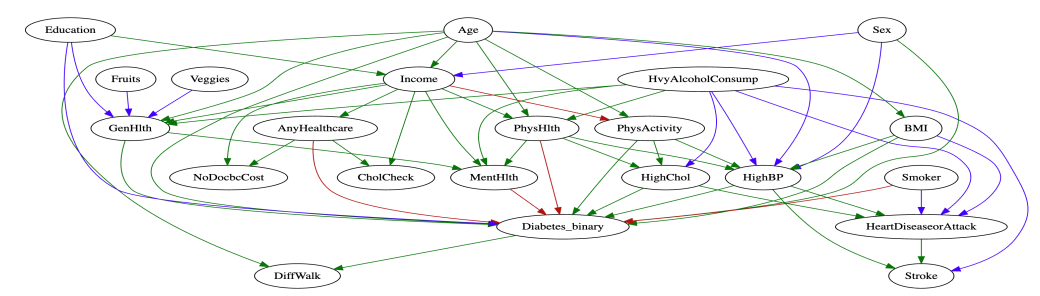

I defined the network structure with BayesianNetwork using a list of parent-child relationships.

In [64]:
from pgmpy.models import BayesianNetwork 
network_model = BayesianNetwork([('HvyAlcoholConsump', 'PhysHlth'),  
                                 ('Sex', 'Diabetes_binary'), 
                                 ('Sex', 'HighBP'), 
                                 ('Sex', 'Income'), 
                                 ('Age', 'Income'), 
                                 ('Age', 'GenHlth'), 
                                 ('Age', 'Diabetes_binary'), 
                                 ('Age', 'BMI'), 
                                 ('Age', 'PhysActivity'), 
                                 ('Age', 'DiffWalk'), 
                                 ('Age', 'PhysHlth'), 
                                 ('Age', 'HighBP'), 
                                 ('Income', 'GenHlth'), 
                                 ('Income', 'MentHlth'), 
                                 ('Income', 'PhysHlth'), 
                                 ('Income', 'AnyHealthcare'), 
                                 ('Income', 'NoDocbcCost'), 
                                 ('Income', 'CholCheck'), 
                                 ('HvyAlcoholConsump', 'MentHlth'), 
                                 ('HvyAlcoholConsump', 'GenHlth'), 
                                 ('HvyAlcoholConsump', 'HighBP'), 
                                 ('HvyAlcoholConsump', 'HeartDiseaseorAttack'), 
                                 ('HvyAlcoholConsump', 'HighChol'), 
                                 ('HvyAlcoholConsump', 'Stroke'), 
                                 ('AnyHealthcare', 'NoDocbcCost'), 
                                 ('AnyHealthcare', 'CholCheck'), 
                                 ('BMI', 'Diabetes_binary'), 
                                 ('BMI', 'HighBP'), 
                                 ('BMI', 'HeartDiseaseorAttack'), 
                                 ('HighBP', 'HeartDiseaseorAttack'), 
                                 ('HighBP', 'Stroke'), 
                                 ('HighBP', 'Diabetes_binary'), 
                                 ('HighChol', 'HeartDiseaseorAttack'), 
                                 ('HighChol', 'Diabetes_binary'), 
                                 ('HeartDiseaseorAttack', 'Stroke'), 
                                 ('GenHlth', 'Diabetes_binary'), 
                                 ('GenHlth', 'MentHlth'), 
                                 ('Diabetes_binary', 'DiffWalk'), 
                                 ('Fruits', 'GenHlth'), 
                                 ('Veggies', 'GenHlth'), 
                                 ('Education', 'Income'), 
                                 ('Education', 'GenHlth'), 
                                 ('Education', 'Diabetes_binary'), 
                                 ('Smoker', 'HeartDiseaseorAttack'), 
                                 ('PhysActivity', 'Diabetes_binary'), 
                                 ('PhysHlth', 'MentHlth'), 
                                 ('PhysHlth', 'HighBP'), 
                                 ('PhysHlth', 'HighChol'), 
                                 ('PhysActivity', 'HighChol'), 
                                 ('PhysActivity', 'HighBP'), 
                                 ('PhysHlth', 'Diabetes_binary'), 
                                 ('Smoker', 'Diabetes_binary'), 
                                 ('AnyHealthcare', 'Diabetes_binary'), 
                                 ('MentHlth', 'Diabetes_binary'), 
                                 ('Income', 'PhysActivity')])


In [65]:
from pgmpy.estimators import MaximumLikelihoodEstimator
import copy

#ensures that all nested objects are also copied, thus preventing any accidental shared references between the original and the copy
network_model_mle = copy.deepcopy(network_model)
mle = MaximumLikelihoodEstimator(network_model_mle, df)
network_model_mle.fit(df, estimator=MaximumLikelihoodEstimator)

for cpd in network_model_mle.get_cpds():
    print(f"CPD of {cpd.variable}:")
    print(cpd, "\n****************************")


CPD of HvyAlcoholConsump:
+----------------------+-----------+
| HvyAlcoholConsump(0) | 0.943803  |
+----------------------+-----------+
| HvyAlcoholConsump(1) | 0.0561968 |
+----------------------+-----------+ 
****************************
CPD of PhysHlth:
+-------------------+-----+----------------------+
| Age               | ... | Age(6)               |
+-------------------+-----+----------------------+
| HvyAlcoholConsump | ... | HvyAlcoholConsump(1) |
+-------------------+-----+----------------------+
| Income            | ... | Income(4)            |
+-------------------+-----+----------------------+
| PhysHlth(0)       | ... | 0.900398406374502    |
+-------------------+-----+----------------------+
| PhysHlth(1)       | ... | 0.04701195219123506  |
+-------------------+-----+----------------------+
| PhysHlth(2)       | ... | 0.05258964143426295  |
+-------------------+-----+----------------------+ 
****************************
CPD of Sex:
+--------+----------+
| Sex(0) | 0.55

In [66]:
from pgmpy.estimators import BayesianEstimator

network_model_be = copy.deepcopy(network_model)
network_model_be.fit(df, estimator= BayesianEstimator, prior_type="BDeu",equivalent_sample_size=10)

for cpd in network_model_be.get_cpds():
    print(f"CPD of {cpd.variable}:")
    print(cpd, "\n****************************")


CPD of HvyAlcoholConsump:
+----------------------+-----------+
| HvyAlcoholConsump(0) | 0.943786  |
+----------------------+-----------+
| HvyAlcoholConsump(1) | 0.0562143 |
+----------------------+-----------+ 
****************************
CPD of PhysHlth:
+-------------------+-----+----------------------+
| Age               | ... | Age(6)               |
+-------------------+-----+----------------------+
| HvyAlcoholConsump | ... | HvyAlcoholConsump(1) |
+-------------------+-----+----------------------+
| Income            | ... | Income(4)            |
+-------------------+-----+----------------------+
| PhysHlth(0)       | ... | 0.9003042876901799   |
+-------------------+-----+----------------------+
| PhysHlth(1)       | ... | 0.047059474412171516 |
+-------------------+-----+----------------------+
| PhysHlth(2)       | ... | 0.0526362378976487   |
+-------------------+-----+----------------------+ 
****************************
CPD of Sex:
+--------+----------+
| Sex(0) | 0.55

In [67]:
print('According to the Markov condition, every node in Bayesian Network is Conditionally independent of its nondescendants, given its parents. so here we have:\n')
for v in column_names:
    print(network_model.local_independencies(v))

According to the Markov condition, every node in Bayesian Network is Conditionally independent of its nondescendants, given its parents. so here we have:

(Diabetes_binary ⟂ Stroke, HvyAlcoholConsump, Income, Veggies, Fruits, NoDocbcCost, HeartDiseaseorAttack, CholCheck | Education, PhysActivity, BMI, PhysHlth, Age, GenHlth, MentHlth, HighBP, Sex, HighChol, AnyHealthcare, Smoker)
(HighBP ⟂ Education, CholCheck, Income, GenHlth, MentHlth, HighChol, Fruits, NoDocbcCost, AnyHealthcare, Smoker, Veggies | HvyAlcoholConsump, PhysActivity, BMI, PhysHlth, Sex, Age)
(HighChol ⟂ Education, BMI, Income, Age, GenHlth, Veggies, MentHlth, HighBP, Sex, Fruits, NoDocbcCost, AnyHealthcare, Smoker, CholCheck | PhysActivity, HvyAlcoholConsump, PhysHlth)
(CholCheck ⟂ BMI, HighBP, Sex, HighChol, Fruits, NoDocbcCost, DiffWalk, HeartDiseaseorAttack, Stroke, Education, HvyAlcoholConsump, PhysActivity, PhysHlth, Age, GenHlth, MentHlth, Diabetes_binary, Smoker, Veggies | AnyHealthcare, Income)
(BMI ⟂ Education,

In [68]:
''' 
The idea of this function is refered to the notebook:
 A Bayesian Network to model the influence of energy consumption on greenhouse gases in Italy
 by Lorenzo Mario Amorosa link: https://pgmpy.org/detailed_notebooks/11.%20A%20Bayesian%20Network%20to%20model%20the%20influence%20of%20energy%20consumption%20on%20greenhouse%20gases%20in%20Italy.html#first
'''
def active_trails_of(query, evidence=None):
    # Ensure evidence is a set for uniform handling
    evidence_set = set(evidence) if evidence else set()
    active_trails = network_model.active_trail_nodes(query, observed=evidence).get(query, set())
    active_trails.discard(query)  # Remove the query itself from the results

    if active_trails:
        evidence_msg = f"given the evidence {evidence_set}" if evidence_set else "given no evidence"
        print(f"Active trails between '{query}' and {active_trails} {evidence_msg}.")
    else:
        print(f"No active trails for '{query}' given the evidence {evidence_set}.")


def markov_blanket_of(node):
    markov_blanket = set(network_model.get_markov_blanket(node))
    print(f"Markov blanket of '{node}' is {markov_blanket}")

In [69]:
active_trails_of(query='Diabetes_binary', evidence=[])
active_trails_of(query='Diabetes_binary', evidence=["PhysActivity", "Sex", "MentHlth", "BMI", "HighBP", "Smoker", "GenHlth", "Education", "AnyHealthcare", "HighChol", "PhysHlth", "Age"])
active_trails_of(query='Income', evidence=["Sex", "Education", "Age"])
active_trails_of(query="HighChol", evidence=["PhysActivity", "HvyAlcoholConsump", "PhysHlth"])
print("**************")
markov_blanket_of(node='Diabetes_binary')
markov_blanket_of(node='HighBP')
markov_blanket_of(node='Income')
markov_blanket_of(node='HeartDiseaseorAttack')



Active trails between 'Diabetes_binary' and {'BMI', 'Income', 'HighBP', 'Sex', 'HighChol', 'Fruits', 'NoDocbcCost', 'AnyHealthcare', 'DiffWalk', 'HeartDiseaseorAttack', 'CholCheck', 'Stroke', 'Education', 'HvyAlcoholConsump', 'PhysActivity', 'PhysHlth', 'Age', 'GenHlth', 'MentHlth', 'Smoker', 'Veggies'} given no evidence.
Active trails between 'Diabetes_binary' and {'DiffWalk'} given the evidence {'Education', 'PhysActivity', 'BMI', 'PhysHlth', 'Age', 'GenHlth', 'MentHlth', 'HighBP', 'Sex', 'HighChol', 'AnyHealthcare', 'Smoker'}.
Active trails between 'Income' and {'Stroke', 'PhysActivity', 'PhysHlth', 'GenHlth', 'MentHlth', 'Diabetes_binary', 'AnyHealthcare', 'HighBP', 'HighChol', 'NoDocbcCost', 'DiffWalk', 'HeartDiseaseorAttack', 'CholCheck'} given the evidence {'Education', 'Sex', 'Age'}.
Active trails between 'HighChol' and {'Stroke', 'Diabetes_binary', 'DiffWalk', 'HeartDiseaseorAttack'} given the evidence {'PhysActivity', 'HvyAlcoholConsump', 'PhysHlth'}.
**************
Markov bl

***By calling get_assertions, we can find out how many times a variable appears in independence assertions as independent variables or evidence. but since the network and dataset are complex, it takes so much resource from the CPU and RAM that my laptop shut down several times during the process. Also, I tried Google Colab, but it is also not possible with the free plan.***

In [70]:
# test_assertions = network_model_be.get_independencies().get_assertions()
# print(test_assertions)

In [71]:
import time
from pgmpy.inference import VariableElimination

infer_mle = VariableElimination(network_model_mle)
infer_be = VariableElimination(network_model_be)




def ask_query(infer, variables, evidence=None, show_progress=False):

    try:
        start_time = time.time()
        # Perform the query
        result = infer.query(variables=variables,
                             evidence=evidence,
                             show_progress=show_progress)
        # Print the result of the query
        print(result)
    # except Exception as e:
    #     print(f"An error occurred during the query: {e}")
    finally:
        # Calculate and print the execution time
        elapsed_time = time.time() - start_time
        print(f'*** Query Run-time: {elapsed_time:.4f} seconds ***\n')


In [72]:
ask_query(infer_mle, variables=['Diabetes_binary'], evidence=None)
ask_query(infer_be, variables=['Diabetes_binary'], evidence=None)

+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.8460 |
+--------------------+------------------------+
| Diabetes_binary(1) |                 0.1540 |
+--------------------+------------------------+
*** Query Run-time: 0.0092 seconds ***

+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.8459 |
+--------------------+------------------------+
| Diabetes_binary(1) |                 0.1541 |
+--------------------+------------------------+
*** Query Run-time: 0.0060 seconds ***



**Query:** What is the probability of having diabetes given different income and education levels?

<span style="color: #87CEEB;"><b>Purpose:</b> To explore how socio-economic factors such as income and education influence the risk of diabetes.</span>

In [73]:
ask_query(infer_be, variables=['Diabetes_binary'], evidence={'Income' : 4, 'Education' : 3})
ask_query(infer_be, variables=['Diabetes_binary'], evidence={'Income' : 2, 'Education' : 2})
ask_query(infer_be, variables=['Diabetes_binary'], evidence={'Income' : 1, 'Education' : 1})

+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.8910 |
+--------------------+------------------------+
| Diabetes_binary(1) |                 0.1090 |
+--------------------+------------------------+
*** Query Run-time: 0.0050 seconds ***

+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.7753 |
+--------------------+------------------------+
| Diabetes_binary(1) |                 0.2247 |
+--------------------+------------------------+
*** Query Run-time: 0.0051 seconds ***

+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.5984 |
+--------------------+------------------------+
| Diabet

**Query:**: How does having high blood pressure, high blood cholesterol, and having heart disease or attacks affect the probability of diabetes in individuals?

<span style="color: #87CEEB;"><b>Purpose:</b> To determine if diabetes has a relationship to cardiovascular problems and the status of high cholesterol and blood pressure.<span>

In [74]:
ask_query(infer_be, variables=['Diabetes_binary'], evidence={'HeartDiseaseorAttack' : 0,'HighBP' : 0, 'HighChol' : 0})
ask_query(infer_be, variables=['Diabetes_binary'], evidence={'HeartDiseaseorAttack' : 0,'HighBP' : 1, 'HighChol' : 1})
ask_query(infer_be, variables=['Diabetes_binary'], evidence={'HeartDiseaseorAttack' : 1,'HighBP' : 1, 'HighChol' : 1})

+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.9279 |
+--------------------+------------------------+
| Diabetes_binary(1) |                 0.0721 |
+--------------------+------------------------+
*** Query Run-time: 0.0112 seconds ***

+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.7178 |
+--------------------+------------------------+
| Diabetes_binary(1) |                 0.2822 |
+--------------------+------------------------+
*** Query Run-time: 0.0104 seconds ***

+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.7177 |
+--------------------+------------------------+
| Diabet

**Query**: How does consumption of fruits and vegetables and being physically active affect diabetes?

<span style="color: #87CEEB;"><b>Purpose:</b> To investigate whether a diet rich in fruits and a healthy lifestyle have a correlation with getting diabetes.

In [75]:
ask_query(infer_be, variables=['Diabetes_binary'], evidence={'PhysActivity' : 0, 'Fruits' : 0, 'Veggies': 0})
ask_query(infer_be, variables=['Diabetes_binary'], evidence={'PhysActivity' : 1, 'Fruits' : 1, 'Veggies': 1})

+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.7882 |
+--------------------+------------------------+
| Diabetes_binary(1) |                 0.2118 |
+--------------------+------------------------+
*** Query Run-time: 0.0062 seconds ***

+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.8655 |
+--------------------+------------------------+
| Diabetes_binary(1) |                 0.1345 |
+--------------------+------------------------+
*** Query Run-time: 0.0062 seconds ***



**Query**: How might the presence of walking difficulties and poor overall health serve as indicators of diabetes?

<span style="color: #87CEEB;"><b>Purpose:</b>: To explore the correlation between diabetes and poor overall health as well as restricted walking.</span>

In [76]:
ask_query(infer_be, variables=['Diabetes_binary'], evidence={'DiffWalk' : 0, 'GenHlth' : 1})
ask_query(infer_be, variables=['Diabetes_binary'], evidence={'DiffWalk' : 1, 'GenHlth' : 3})


+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.9303 |
+--------------------+------------------------+
| Diabetes_binary(1) |                 0.0697 |
+--------------------+------------------------+
*** Query Run-time: 0.0060 seconds ***

+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.3765 |
+--------------------+------------------------+
| Diabetes_binary(1) |                 0.6235 |
+--------------------+------------------------+
*** Query Run-time: 0.0072 seconds ***



**Query**: What is the likelihood of developing diabetes in those who consume excessive amounts of alcohol and engage in smoking?

<span style="color: #87CEEB;"><b>Purpose:</b>: To assess the potential correlation between heavy drinking and smoking with the increased risk to diabetes.</span>

In [77]:
ask_query(infer_be, variables=['Diabetes_binary'], evidence={'HvyAlcoholConsump' : 0, 'Smoker' : 0})
ask_query(infer_be, variables=['Diabetes_binary'], evidence={'HvyAlcoholConsump' : 0, 'Smoker' : 1})
ask_query(infer_be, variables=['Diabetes_binary'], evidence={'HvyAlcoholConsump' : 1, 'Smoker' : 0})
ask_query(infer_be, variables=['Diabetes_binary'], evidence={'HvyAlcoholConsump' : 1, 'Smoker' : 1})


+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.8440 |
+--------------------+------------------------+
| Diabetes_binary(1) |                 0.1560 |
+--------------------+------------------------+
*** Query Run-time: 0.0052 seconds ***

+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.8478 |
+--------------------+------------------------+
| Diabetes_binary(1) |                 0.1522 |
+--------------------+------------------------+
*** Query Run-time: 0.0050 seconds ***

+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.8487 |
+--------------------+------------------------+
| Diabet

**Query**: What is the impact of gender and BMI category on the probability of developing diabetes? ?

<span style="color: #87CEEB;"><b>Purpose:</b>: It aims to examine possible gender-specific and BMI-related risk patterns associated with Diabetes.

In [78]:
ask_query(infer_be, variables=['Diabetes_binary'], evidence={'Sex' : 0, 'BMI' : 0})
ask_query(infer_be, variables=['Diabetes_binary'], evidence={'Sex' : 1, 'BMI' : 0})


ask_query(infer_be, variables=['Diabetes_binary'], evidence={'Sex' : 0, 'BMI' : 1})
ask_query(infer_be, variables=['Diabetes_binary'], evidence={'Sex' : 1, 'BMI' : 1})


ask_query(infer_be, variables=['Diabetes_binary'], evidence={'Sex' : 0, 'BMI' :2})
ask_query(infer_be, variables=['Diabetes_binary'], evidence={'Sex' : 1, 'BMI' : 2})

+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.9100 |
+--------------------+------------------------+
| Diabetes_binary(1) |                 0.0900 |
+--------------------+------------------------+
*** Query Run-time: 0.0052 seconds ***

+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.8744 |
+--------------------+------------------------+
| Diabetes_binary(1) |                 0.1256 |
+--------------------+------------------------+
*** Query Run-time: 0.0050 seconds ***

+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.8418 |
+--------------------+------------------------+
| Diabet

<span style="color: #87CEEB;"><b>Additionally, we can ask queries like these with different evidence to understand the chance of diabetes in different individuals.:</b></span>

<b>P</b> (<span style="color: #87CEEB;"><b>Binary_diabetes</b></span> | <span style="color: #87CEEB;"><b>Income</b></span> = greater than $50,000, <span style="color: #87CEEB;"><b>Age</b></span> = Between65and74, <span style="color: #87CEEB;"><b>Sex</b></span> = Male, <span style="color: #87CEEB;"><b>PhysActivity</b></span> = Yes, <span style="color: #87CEEB;"><b>BMI</b></span> = 25-39, <span style="color: #87CEEB;"><b>HighBP</b></span> = Yes)

In [79]:
ask_query(infer_be, variables=['Diabetes_binary'], evidence={'Income' : 4, 'Age' :5, 'Sex' :1, 'PhysActivity' :1, 'BMI' :1, 'HighBP' :1})


+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.7814 |
+--------------------+------------------------+
| Diabetes_binary(1) |                 0.2186 |
+--------------------+------------------------+
*** Query Run-time: 0.0020 seconds ***



<b>P</b> (<span style="color: #87CEEB;"><b>Binary_diabetes</b></span> | <span style="color: #87CEEB;"><b>Income</b></span> = between $0-14,999, <span style="color: #87CEEB;"><b>Age</b></span> = Between55and64, <span style="color: #87CEEB;"><b>Sex</b></span> = Female, <span style="color: #87CEEB;"><b>PhysActivity</b></span> = Yes, <span style="color: #87CEEB;"><b>BMI</b></span> = 25-39, <span style="color: #87CEEB;"><b>HighBP</b></span> = Yes)

In [80]:
ask_query(infer_be, variables=['Diabetes_binary'], evidence={'Income' : 1, 'Age' :4, 'Sex' :0, 'PhysActivity' :1, 'BMI' :1, 'HighBP' :1})


+--------------------+------------------------+
| Diabetes_binary    |   phi(Diabetes_binary) |
+====================+========================+
| Diabetes_binary(0) |                 0.6924 |
+--------------------+------------------------+
| Diabetes_binary(1) |                 0.3076 |
+--------------------+------------------------+
*** Query Run-time: 0.0020 seconds ***



In [81]:
from pgmpy.sampling import BayesianModelSampling
from pgmpy.factors.discrete import State
inference_sampling = BayesianModelSampling(network_model_be)
df_fw_sample = inference_sampling.forward_sample(size=250000, show_progress=False)
print(df_fw_sample)

        HvyAlcoholConsump  PhysHlth  Sex  Diabetes_binary  HighBP  Income  \
0                       0         2    1                1       1       1   
1                       0         0    0                0       0       3   
...                   ...       ...  ...              ...     ...     ...   
249998                  0         0    1                0       0       1   
249999                  1         0    0                0       1       2   

        Age  GenHlth  BMI  PhysActivity  DiffWalk  MentHlth  AnyHealthcare  \
0         4        2    1             0         0         2              1   
1         4        1    0             1         0         0              1   
...     ...      ...  ...           ...       ...       ...            ...   
249998    5        2    1             0         0         0              1   
249999    5        3    0             0         1         0              1   

        NoDocbcCost  CholCheck  HeartDiseaseorAttack  HighChol  Stro

c:\Users\xavir\AppData\Local\Programs\Python\Python311\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


In [82]:
series_Diabetes = df_fw_sample['Diabetes_binary'].value_counts()
print('Phi(Diabetes_binary = Negative) = ',series_Diabetes[0]/(sum(series_Diabetes)) )
print('Phi(Diabetes_binary = Positive) =',series_Diabetes[1]/(sum(series_Diabetes)) )

Phi(Diabetes_binary = Negative) =  0.810932
Phi(Diabetes_binary = Positive) = 0.189068


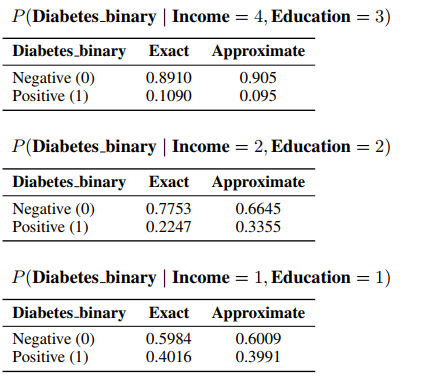

***Here are points about exact and approximation inference:***

-  Exact inference Provides precise probabilities while approximate inference Offers probabilistic approximations of the true probabilities.
- The Performance of sample rejection method Can be very slow if the evidence is unlikely under the prior distribution as we can see different durations for different set of evidence. 

In [83]:

start_time = time.time()
evidence0 = [State(var='Income', state= 4), State(var='Education', state= 3)]
df_0 = inference_sampling.rejection_sample(evidence=evidence0, size=10000, show_progress=False)
elapsed_time = time.time() - start_time
print(f"time for generating samples with the rejection sample method: {elapsed_time}")

c:\Users\xavir\AppData\Local\Programs\Python\Python311\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


time for generating samples with the rejection sample method: 2.1471705436706543


c:\Users\xavir\AppData\Local\Programs\Python\Python311\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


In [84]:

start_time = time.time()
series_Diabetes_reject_sample_0 = df_0['Diabetes_binary'].value_counts()
print('Phi(Diabetes_binary = Negative) = ',series_Diabetes_reject_sample_0[0]/(sum(series_Diabetes_reject_sample_0)) )
print('Phi(Diabetes_binary = Positive) =',series_Diabetes_reject_sample_0[1]/(sum(series_Diabetes_reject_sample_0)) )
elapsed_time = time.time() - start_time
print(f"time for approximate inferences with the rejection sample method: {elapsed_time}")

Phi(Diabetes_binary = Negative) =  0.905
Phi(Diabetes_binary = Positive) = 0.095
time for approximate inferences with the rejection sample method: 0.0010013580322265625


In [85]:
start_time = time.time()
evidence1 = [State(var='Income', state= 2), State(var='Education', state= 2)]
df_1 = inference_sampling.rejection_sample(evidence=evidence1, size=10000, show_progress=False)
elapsed_time = time.time() - start_time
print(f"time for generating samples with the rejection sample method: {elapsed_time}")

c:\Users\xavir\AppData\Local\Programs\Python\Python311\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


time for generating samples with the rejection sample method: 5.347184419631958


c:\Users\xavir\AppData\Local\Programs\Python\Python311\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


In [86]:

start_time = time.time()
series_Diabetes_reject_sample_1 = df_1['Diabetes_binary'].value_counts()
print('Phi(Diabetes_binary = Negative) = ',series_Diabetes_reject_sample_1[0]/(sum(series_Diabetes_reject_sample_1)) )
print('Phi(Diabetes_binary = Positive) =',series_Diabetes_reject_sample_1[1]/(sum(series_Diabetes_reject_sample_1)) )
elapsed_time = time.time() - start_time
print(f"time for approximate inferences with the rejection sample method: {elapsed_time}")

Phi(Diabetes_binary = Negative) =  0.6645
Phi(Diabetes_binary = Positive) = 0.3355
time for approximate inferences with the rejection sample method: 0.0009996891021728516


In [87]:
start_time = time.time()
evidence2 = [State(var='Income', state= 1), State(var='Education', state= 1)]
df_2 = inference_sampling.rejection_sample(evidence=evidence2, size=10000, show_progress=False)
elapsed_time = time.time() - start_time
print(f"time for generating samples with the rejection sample method: {elapsed_time}")

c:\Users\xavir\AppData\Local\Programs\Python\Python311\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
c:\Users\xavir\AppData\Local\Programs\Python\Python311\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
c:\Users\xavir\AppData\Local\Programs\Python\Python311\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
c:\Users\xavir\AppData\Local\Programs\Python\Python311\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is d

time for generating samples with the rejection sample method: 64.01711201667786


c:\Users\xavir\AppData\Local\Programs\Python\Python311\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


In [88]:

start_time = time.time()
series_Diabetes_reject_sample_2 = df_2['Diabetes_binary'].value_counts()
print('Phi(Diabetes_binary = Negative) = ',series_Diabetes_reject_sample_2[0]/(sum(series_Diabetes_reject_sample_2)) )
print('Phi(Diabetes_binary = Positive) =',series_Diabetes_reject_sample_2[1]/(sum(series_Diabetes_reject_sample_2)) )
elapsed_time = time.time() - start_time
print(f"time for approximate inferences with the rejection sample method: {elapsed_time}")

Phi(Diabetes_binary = Negative) =  0.6009
Phi(Diabetes_binary = Positive) = 0.3991
time for approximate inferences with the rejection sample method: 0.001001596450805664
